In [7]:
from sklearn.datasets import load_boston
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt

## Data Preparation

In [8]:
data=load_boston()
bostonDF=pd.DataFrame(data.data, columns=data.feature_names)
bostonDF['Target']=data.target

X_train, X_test, y_train, y_test = train_test_split(bostonDF.drop(columns=['Target']), bostonDF['Target'], test_size=0.2, random_state=220)
std=StandardScaler()
norm=Normalizer()
X_train=std.fit_transform(X_train)
X_train=norm.fit_transform(X_train)
X_test=std.transform(X_test)
X_test=norm.transform(X_test)

pca=PCA(1)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

## Draw Regression Line

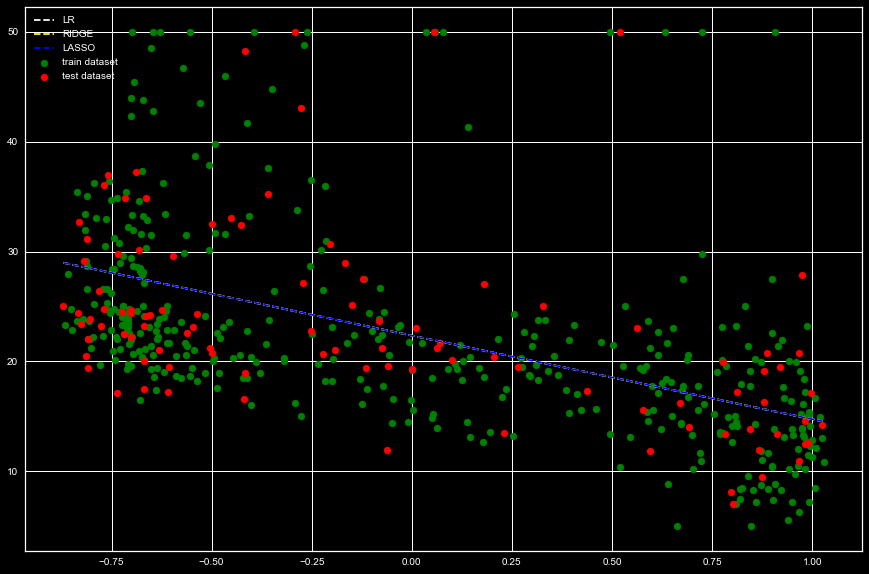

In [33]:
LR=LinearRegression()
LR.fit(X_train, y_train)

RG=Ridge(alpha=0.001)
RG.fit(X_train, y_train)

LS=Lasso(0.001)
LS.fit(X_train, y_train)

x_vals = np.linspace(X_test.min(), X_test.max(), 1000)
lr_y_vals = LR.intercept_ + LR.coef_[0] * x_vals
rg_y_vals = RG.intercept_ + RG.coef_[0] * x_vals
ls_y_vals = LS.intercept_ + LS.coef_[0] * x_vals

plt.figure(figsize=(15, 10))
plt.style.use('dark_background')
plt.scatter(X_train, y_train, color='Green', label='train dataset')
plt.scatter(X_test, y_test, color='Red', label='test dataset')
plt.plot(x_vals, lr_y_vals, '--', color='White', label='LR')
plt.plot(x_vals, rg_y_vals, '--', color='Yellow', label='RIDGE')
plt.plot(x_vals, ls_y_vals, '--', color='Blue', label='LASSO')
plt.legend()
plt.show()